In [20]:
import sys
sys.path.append('../..')

import numpy as np
import matplotlib.pyplot as plt
from scripts.NeuralNetwork.led import LED

In [21]:
# Indicate the path of the dataset
path_data = '../../dataset/VDP_testset/VDP_testset_0.npz'

# Indicate the name of the pre-trained autoencoder and RNN
ae_name = 'VDP_ae_identity'
rnn_name = 'VDP_rnn'

# Indicate the desired length of the prediction 
length_prediction = 180

# Instantiate the LED object
led = LED(autoencoder_name=ae_name,
          rnn_name=rnn_name,
          length_prediction=length_prediction)

In [22]:
# Upload the data
led.get_data(path_data,compressed_name='data')

In [23]:
# Run the LED
led.run(identity=True)

In [24]:
# Compute the error
err = led.compute_error()

In [25]:
print(np.shape(led.data))
print(np.shape(led.forecast))

(251, 2)
(250, 2)


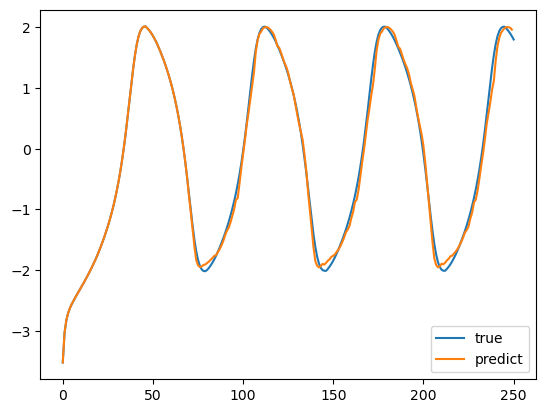

In [26]:
# Plot the real data vs the predicted one

plt.plot(np.arange(0,np.shape(led.data)[0]),led.data[:,0])
plt.plot(np.arange(0,np.shape(led.forecast)[0]),led.forecast[:,0])
plt.legend(['true','predict'])
plt.show()